In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential #import the parts that are used
from tensorflow.keras.layers import Dense, Input #Import Input here
from tensorflow.keras.optimizers import Adam


Very bias model did not balance the solutions for ADHD and Sex

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/widsTeam_15/finalized_df_wids/"


Merged_ros_df.csv  Merged_rus_df.csv  Merged_test_df.csv  Merged_train_df_unbalanced.csv


In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/widsTeam_15/finalized_df_wids/Merged_test_df.csv")
train_df = pd.read_csv("/content/drive/MyDrive/widsTeam_15/finalized_df_wids/Merged_train_df_unbalanced.csv")

In [ ]:
#checking for NA
print("NA for training dataframe: ", train_df.isna().sum().sum())
print("NA for testing dataframe: ", test_df.isna().sum().sum())

NA for training dataframe:  0
NA for testing dataframe:  0


In [ ]:
pd.set_option('display.max_columns', None)
print(test_df.isna().sum())
print(train_df.isna().sum())

participant_id                      0
PreInt_Demos_Fam_Child_Ethnicity    0
Basic_Demos_Enroll_Year_2016        0
Basic_Demos_Enroll_Year_2017        0
Basic_Demos_Enroll_Year_2018        0
                                   ..
196throw_198thcolumn                0
196throw_199thcolumn                0
197throw_198thcolumn                0
197throw_199thcolumn                0
198throw_199thcolumn                0
Length: 19973, dtype: int64
participant_id          0
EHQ_EHQ_Total           0
ColorVision_CV_Score    0
APQ_P_APQ_P_CP          0
APQ_P_APQ_P_ID          0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
Length: 19930, dtype: int64


In [ ]:
print(test_df.shape)
print(train_df.shape)



(304, 19973)
(1213, 19930)


In [ ]:
#identifying common columns
common_columns = list(set(train_df.columns) & set(test_df.columns))
print("Number of common columns:", len(common_columns))

additional_col = [ 'ADHD_Outcome','Sex_F']
# Keep only common columns in both dataframes
train_df_common = train_df[common_columns + additional_col]
test_df_common = test_df[common_columns]

# Show the number of rows and columns in the dataframes with common columns
print(test_df_common.shape)
print(train_df_common.shape)

Number of common columns: 19920
(304, 19920)
(1213, 19922)


In [ ]:
X_train = train_df_common.drop(columns=['participant_id', 'ADHD_Outcome','Sex_F'])
Y_train = train_df_common[['ADHD_Outcome','Sex_F']]
X_test = test_df_common.drop(columns=['participant_id'])
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(1213, 19919)
(1213, 2)
(304, 19919)


In [ ]:
#standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()

# Input layer
input_layer = keras.layers.InputLayer(input_shape=(19919,), name='input')
model.add(input_layer)

# Hidden layers
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu', name='hidden_layer_1')
model.add(hidden_layer_1)

hidden_layer_2 = keras.layers.Dense(units=32, activation='relu', name='hidden_layer_2')
model.add(hidden_layer_2)

hidden_layer_3 = keras.layers.Dense(units=16, activation='relu', name='hidden_layer_3')
model.add(hidden_layer_3)

# Output layer for binary classification
output_layer = keras.layers.Dense(units=2, activation='sigmoid', name='output')
model.add(output_layer)

# Display model summary
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)               │ (None, 64)                  │       1,274,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_2 (Dense)               │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_3 (Dense)               │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,277,522 (4.87 MB)

 Trainable params: 1,277,522 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
num_epochs=60
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['binary_accuracy'])
#training the model
model_hist = model.fit(X_train_scaled, Y_train, epochs=num_epochs, batch_size=32, validation_split=0.2, verbose=1)

predictions = model.predict(X_test_scaled)
train_predictions = model.predict(X_train_scaled)

predicted_ADHD = (predictions[:, 0] > 0.5).astype(int)
predicted_Sex_F = (predictions[:, 1] > 0.5).astype(int)

train_predicted_ADHD = (train_predictions[:, 0] > 0.5).astype(int)
train_predicted_Sex_F = (train_predictions[:, 1] > 0.5).astype(int)


Epoch 1/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - binary_accuracy: 0.5956 - loss: 0.7686 - val_binary_accuracy: 0.6420 - val_loss: 0.6899
Epoch 2/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - binary_accuracy: 0.7897 - loss: 0.6991 - val_binary_accuracy: 0.6543 - val_loss: 0.6631
Epoch 3/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - binary_accuracy: 0.9042 - loss: 0.2310 - val_binary_accuracy: 0.6420 - val_loss: 0.6686
Epoch 4/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - binary_accuracy: 0.9667 - loss: 0.1236 - val_binary_accuracy: 0.6420 - val_loss: 0.6933
Epoch 5/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - binary_accuracy: 0.9849 - loss: 0.0536 - val_binary_accuracy: 0.6543 - val_loss: 0.7127
Epoch 6/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - binary_accuracy: 0.9937 - loss: 0.0307 - val_binary_accuracy: 0.6440 - val_loss: 0.7380
Epoch 7/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - binary_accuracy: 0.9964 - loss: 0.0194 - val_binary_accuracy: 0.6440 - val_loss: 0.7437
Epoch 8/60
31

In [ ]:
# Create a DataFrame with participant_id and predictions
test_predictions = test_df_common[['participant_id']].copy()
test_predictions['ADHD_Outcome'] = predicted_ADHD
test_predictions['Sex_F'] = predicted_Sex_F
test_predictions.to_csv("submission.csv", index=False)

print("Predictions saved to submission.csv")

Predictions saved to submission.csv


Evaluating Model Performance

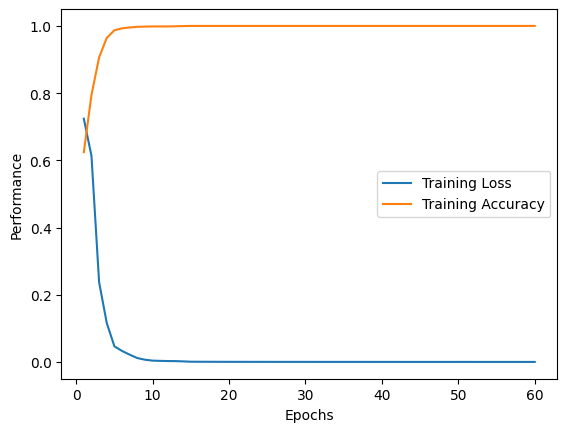

In [ ]:
plt.plot(range(1,num_epochs+1), model_hist.history['loss'], label='Training Loss')
plt.plot(range(1,num_epochs+1), model_hist.history['binary_accuracy'], label='Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [ ]:
test_predictions

,participant_id,ADHD_Outcome,Sex_F
0,Cfwaf5FX7jWK,1,0
1,vhGrzmvA3Hjq,1,0
2,ULliyEXjy4OV,1,1
3,LZfeAb1xMtql,1,1
4,EnFOUv0YK1RG,1,0
...,...,...,...
299,UadZfjdEg7eG,1,1
300,IUEHiLmQAqCi,1,1
301,cRySmCadYFRO,1,1
302,E3MvDUtJadc5,1,1


In [ ]:
#seeing how well the model is doing
from sklearn.metrics import f1_score
actual_ADHD = Y_train['ADHD_Outcome']
actual_Sex_F = Y_train['Sex_F']

adhd_f1 = f1_score(actual_ADHD, train_predicted_ADHD)
sex_f_f1 = f1_score(actual_Sex_F, train_predicted_Sex_F)

print("ADHD F1 Score: ", adhd_f1)
print("Sex F1 Score: ", sex_f_f1)




ADHD F1 Score:  0.9520383693045563
Sex F1 Score:  0.8926014319809069


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Calculate metrics
accuracy_sex = accuracy_score(actual_Sex_F, train_predicted_Sex_F)
precision_sex = precision_score(actual_Sex_F, train_predicted_Sex_F)
recall_sex = recall_score(actual_Sex_F, train_predicted_Sex_F)

print(f"Accuracy for sex: {accuracy_sex:.2f}")
print(f"Precision for sex: {precision_sex:.2f}")
print(f"Recall for sex: {recall_sex:.2f}")


accuracy_adhd = accuracy_score(actual_ADHD, train_predicted_ADHD)
precision_adhd = precision_score(actual_ADHD, train_predicted_ADHD)
recall_adhd = recall_score(actual_ADHD, train_predicted_ADHD)
print()

print(f"Accuracy for ADHD: {accuracy_adhd:.2f}")
print(f"Precision for ADHD: {precision_adhd:.2f}")
print(f"Recall for ADHD: {recall_adhd:.2f}")

Accuracy for sex: 0.93
Precision for sex: 0.89
Recall for sex: 0.90

Accuracy for ADHD: 0.93
Precision for ADHD: 0.95
Recall for ADHD: 0.96
